## FINAL PROJECT SUBMISSION

- GROUP 5

STUDENT NAME:

**- OLIVE MULOMA**

**- ABIGAIL MWENDWA**

**- HAWKINS MURITHI**

**- HARRY ATULAH**

STUDENT PACE: *FULL TIME/HYBRID*

SCHEDULE PROJECT REVIEW DATE/TIME: *29TH JULY 2024*

INSTRUCTOR NAME: **MARYANN MWIKALI**


## NEWSNET PUBLISHING COMPANY

### BUSINESS OVERVIEW

- In today's digital age, news consumption has skyrocketed, and with it, the challenge of efficiently managing and categorizing vast amounts of content. Automated text classification offers a solution by enabling efficient sorting of news articles into relevant categories such as Politics, Technology, Entertainment, and Business. This enhances user experience by ensuring that readers have quick access to content that interests them and assists in organizing and managing content for media companies.

## IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfTransformer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import string
import pickle
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from flask import Flask, request, jsonify, render_template_string
import os
import warnings
warnings.filterwarnings('ignore')

## DATA UNDERSTANDING

In [2]:
data_test = pd.read_csv("data/Data_Test.csv", encoding='latin1')

data_test.head(10)

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...
5,"""Imagine if every message you sent was kept wi..."
6,Positioned along the four sides of the Asus RO...
7,"In fact, when I applied to USC film school the..."
8,"As spotted by Android Police, Netflix is testi..."
9,Her moves were immaculately choreographed as s...


In [3]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STORY   2748 non-null   object
dtypes: object(1)
memory usage: 21.6+ KB


#### The DataFrame `data_test` has:

- All entries in the "STORY" column are non-null and contain text data
- The DataFrame occupies 21.6 KB of memory

**- Description:**  The test dataset contains 2,748 rows and 1 column: STORY.


**- STORY:** Contains the text of news articles, similar to the training dataset but without associated category labels.


**-Usage:** This dataset is used to evaluate the performance of the trained model. The STORY column will be input to the model to predict the category labels, which can then be compared to actual labels (if available) or used for making predictions on new data.

In [4]:
data_test.shape

(2748, 1)

In [5]:
data_train = pd.read_csv("data/Data_Train.csv", encoding='latin1')

data_train.head(10)

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ...",1
4,"In global markets, gold prices edged up today ...",3
5,BEIJING: Chinese tech giant Huawei has announc...,1
6,Mumbai: India Inc's external commercial borrow...,3
7,"On Wednesday, Federal Reserve Chairman Jerome ...",3
8,What more can you give to the audience? I have...,2
9,"com, Arbaaz Khan spoke about getting back to D...",2


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


#### The DataFrame `data_train` has:
    

- All entries in both columns are non-null
- The "STORY" column contains text data (`object` type)
- The "SECTION" column contains integer data (`int64` type)
- The DataFrame occupies 119.3 KB of memory

**- Description:** The training dataset contains 7,628 rows and 2 columns: STORY and SECTION.


**- STORY:** Contains the text of news articles, which will be used to train the model.


**- SECTION:** Contains numerical labels representing different categories or topics (e.g., 0 for Politics, 1 for Technology, etc.), which are the target labels for classification.

**- Usage:** - This dataset is used to train the text classification model. The STORY column provides the content for the model to learn from, while the SECTION column serves as the ground truth labels for supervised learning.

In [7]:
data_train.shape

(7628, 2)

## DATA CLEANING

### Checking for Duplicates

In [8]:
duplicates = data_train[data_train.duplicated()]

duplicates

,STORY,SECTION
587,"Facebook, WhatsApp and Twitter have overhauled...",1
757,We will leave no stone unturned to make the au...,2
948,"""Marvel's 616,"" a documentary series exploring...",1
1472,"Facebook, WhatsApp and Twitter have overhauled...",1
1831,We will leave no stone unturned to make the au...,2
...,...,...
7453,"The whole feels like a giant set, stately and ...",2
7462,"""Monsters at Work,"" a series inspired by Pixar...",1
7465,Commenting on the upcoming Amazon summer sale ...,1
7474,Congress says it needs to verify whether there...,0


- We check for duplicate rows in the data_train DataFrame.In this case, it identified 77 duplicate rows with repeated STORY and SECTION values.

In [9]:
data = data_train.drop_duplicates()

data

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ...",1
4,"In global markets, gold prices edged up today ...",3
...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0
7624,"The film, which also features Janhvi Kapoor, w...",2
7625,The database has been created after bringing t...,1
7626,"The state, which has had an uneasy relationshi...",0


- We then remove the duplicate rows identified in the previous step from the DataFrame.
- The resulting DataFrame (data) now contains only unique rows. It reduced the total number of rows from 7628 to 7551, removing 77 duplicates.

### Adding and Renaming Columns

In [10]:
category_labels = {0: 'Politics', 1: 'Technology', 2: 'Entertainment', 3: 'Business'}
data['CATEGORY'] = data['SECTION'].map(category_labels)

data.head(10)

,STORY,SECTION,CATEGORY
0,But the most painful was the huge reversal in ...,3,Business
1,How formidable is the opposition alliance amon...,0,Politics
2,Most Asian currencies were trading lower today...,3,Business
3,"If you want to answer any question, click on ...",1,Technology
4,"In global markets, gold prices edged up today ...",3,Business
5,BEIJING: Chinese tech giant Huawei has announc...,1,Technology
6,Mumbai: India Inc's external commercial borrow...,3,Business
7,"On Wednesday, Federal Reserve Chairman Jerome ...",3,Business
8,What more can you give to the audience? I have...,2,Entertainment
9,"com, Arbaaz Khan spoke about getting back to D...",2,Entertainment


In [11]:
data.rename(columns={'STORY': 'TEXT'}, inplace=True)
data.rename(columns={'CATEGORY': 'CATEGORY_LABELS'}, inplace=True)
data.rename(columns={'SECTION': 'CATEGORY'}, inplace=True)

In [12]:
data.head(10)

,TEXT,CATEGORY,CATEGORY_LABELS
0,But the most painful was the huge reversal in ...,3,Business
1,How formidable is the opposition alliance amon...,0,Politics
2,Most Asian currencies were trading lower today...,3,Business
3,"If you want to answer any question, click on ...",1,Technology
4,"In global markets, gold prices edged up today ...",3,Business
5,BEIJING: Chinese tech giant Huawei has announc...,1,Technology
6,Mumbai: India Inc's external commercial borrow...,3,Business
7,"On Wednesday, Federal Reserve Chairman Jerome ...",3,Business
8,What more can you give to the audience? I have...,2,Entertainment
9,"com, Arbaaz Khan spoke about getting back to D...",2,Entertainment


**- STORY** is renamed to **TEXT**.


**- CATEGORY** (newly added column) is renamed to **CATEGORY_LABELS** to avoid confusion.


**- SECTION** is renamed to **CATEGORY** to better reflect its meaning.

### Checking For Outliers

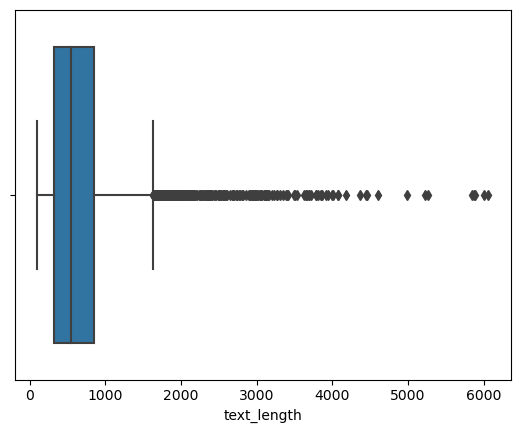

In [13]:
data['text_length'] = data['TEXT'].apply(len)
sns.boxplot(data['text_length'])
plt.show()

- We chose not to remove the outliers because they provide unique insights and capture important linguistic diversity.
- Keeping them helps our models handle real-world data better by reflecting different dialects, slang, and rare topics.
- Outliers also address data imbalance, aid in error analysis, and ensure our models are robust and comprehensive. 
- In essence, including outliers enhances the overall performance and reliability of our NLP model.

### Text Preprocess

In [14]:
# Lemmatizer
lemmatizer = WordNetLemmatizer()

# Definition stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removal of stop words and lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    processed_text = ' '.join(tokens)
    
    return processed_text

data['PROCESSED_TEXT'] = data['TEXT'].apply(preprocess_text)

In [15]:
data.head(10)

,TEXT,CATEGORY,CATEGORY_LABELS,text_length,PROCESSED_TEXT
0,But the most painful was the huge reversal in ...,3,Business,849,painful huge reversal fee income unheard among...
1,How formidable is the opposition alliance amon...,0,Politics,129,formidable opposition alliance among congress ...
2,Most Asian currencies were trading lower today...,3,Business,389,asian currency trading lower today south korea...
3,"If you want to answer any question, click on ...",1,Technology,593,want answer question click answer clicking a...
4,"In global markets, gold prices edged up today ...",3,Business,299,global market gold price edged today disappoin...
5,BEIJING: Chinese tech giant Huawei has announc...,1,Technology,404,beijing chinese tech giant huawei announced pl...
6,Mumbai: India Inc's external commercial borrow...,3,Business,529,mumbai india inc external commercial borrowing...
7,"On Wednesday, Federal Reserve Chairman Jerome ...",3,Business,323,wednesday federal reserve chairman jerome powe...
8,What more can you give to the audience? I have...,2,Entertainment,215,give audience already done yeh hai aashiqui py...
9,"com, Arbaaz Khan spoke about getting back to D...",2,Entertainment,245,com arbaaz khan spoke getting back dabangg sal...


# EXPLORATORY DATA ANALYSIS (EDA)

### Distribution of article length

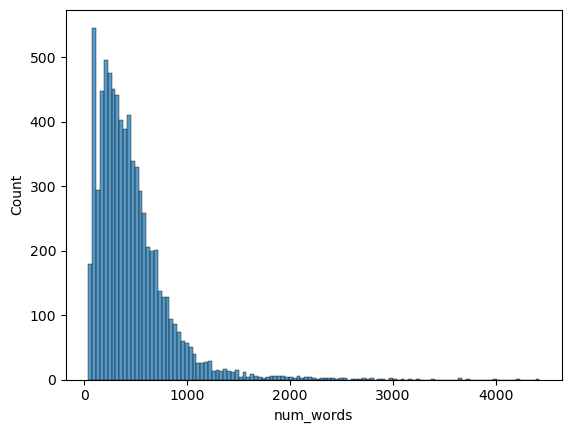

In [16]:
data['num_words'] = data.PROCESSED_TEXT.apply(len)
sns.histplot(data.num_words);

- This histogram helps us understand the distribution of article lengths in our dataset. 
- It shows that most articles are short to medium in length, with a few being much longer. 
- This insight helps us tailor our text processing and model training by revealing the typical text length and identifying any potential outliers.

### Distribution of categories

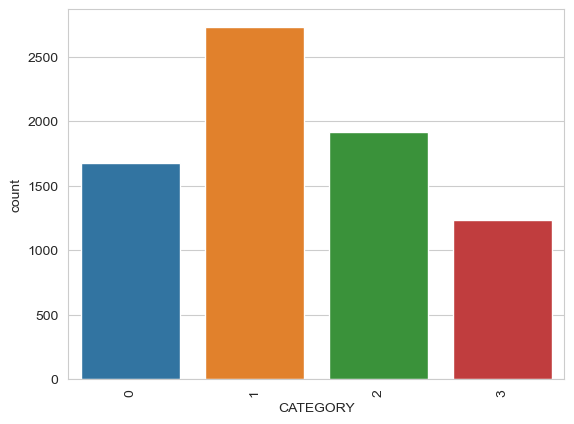

In [17]:
sns.set_style("whitegrid")
sns.countplot(x='CATEGORY', data=data)
plt.xticks(rotation=90)
plt.show()

- This countplot reveals that Category 1 has the most articles compared to other categories. 
- Understanding this helps us see if our dataset is imbalanced, which is important for adjusting our model training to ensure it performs well across all categories, not just the most common ones.